Counts:
 class
good    700
bad     300
Name: count, dtype: int64

Percentages (%):
 class
good    70.0
bad     30.0
Name: proportion, dtype: float64

Missing in target: 0


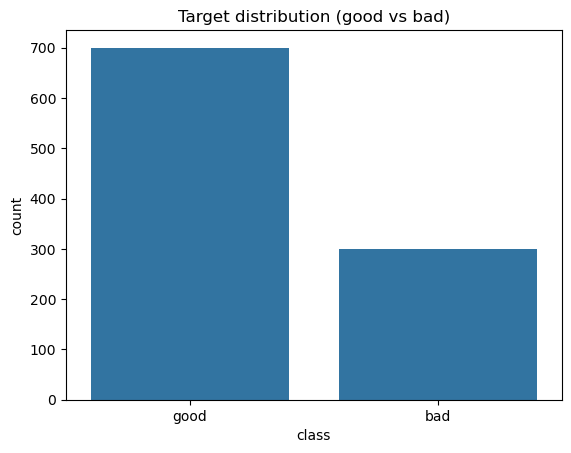

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("../data\credit_customers (1).csv") 
df.describe()
# 1) Raw counts
counts = df["class"].value_counts(dropna=False)
print("Counts:\n", counts)

# 2) Percentages
pct = df["class"].value_counts(normalize=True) * 100
print("\nPercentages (%):\n", pct.round(2))

# 3) Quick sanity: any missing in target?
missing_target = df["class"].isna().sum()
print(f"\nMissing in target: {missing_target}")

# 4) Plot
sns.countplot(x="class", data=df)
plt.title("Target distribution (good vs bad)")
plt.xlabel("class")
plt.ylabel("count")
plt.show()



3. Numeric features (distribution + outliers)

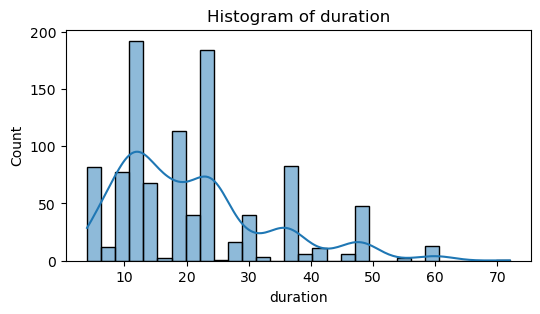

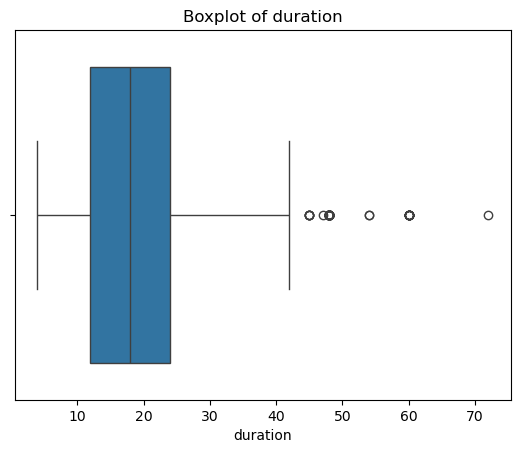

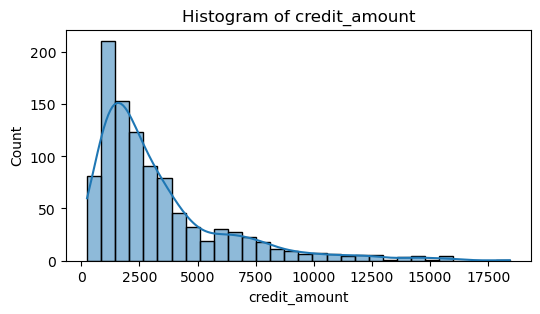

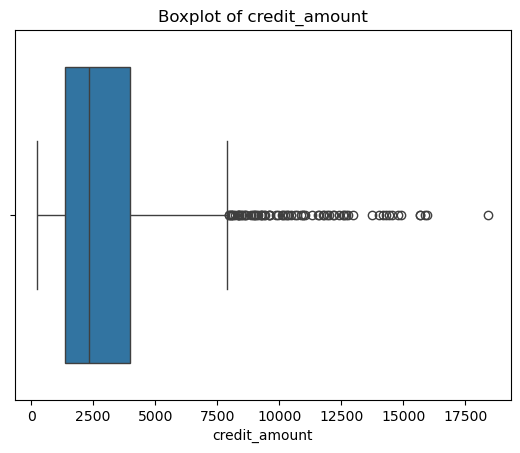

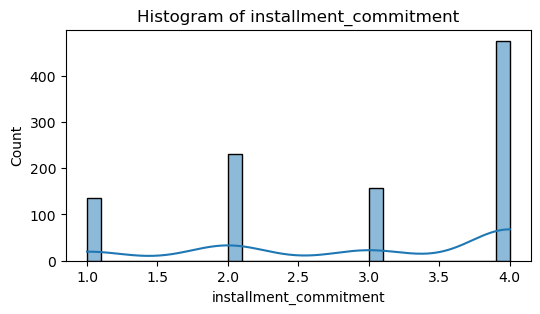

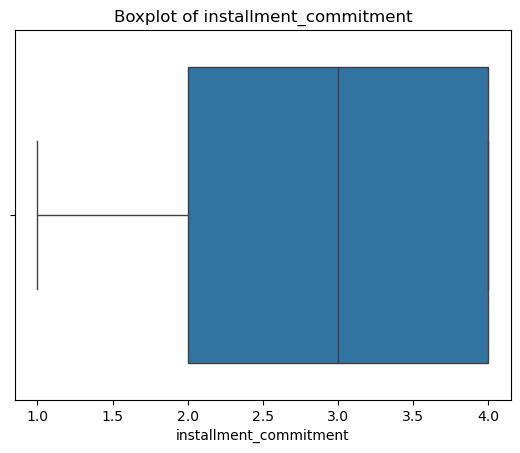

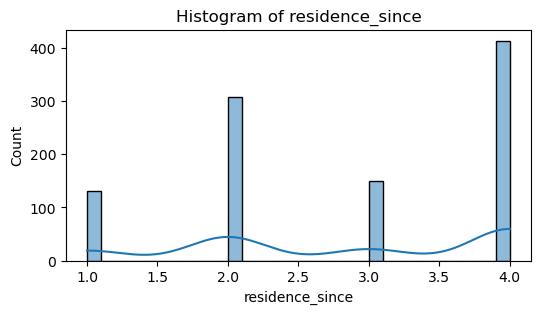

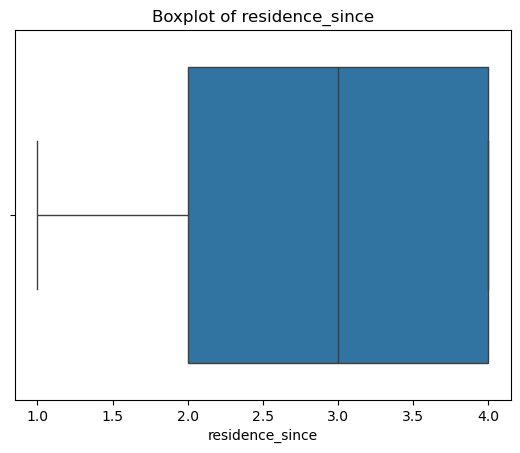

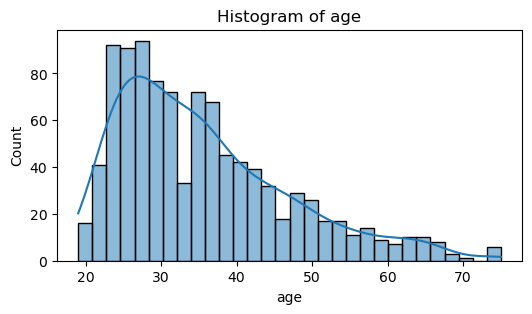

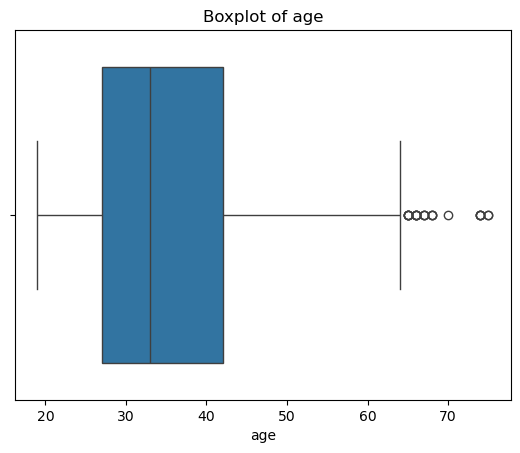

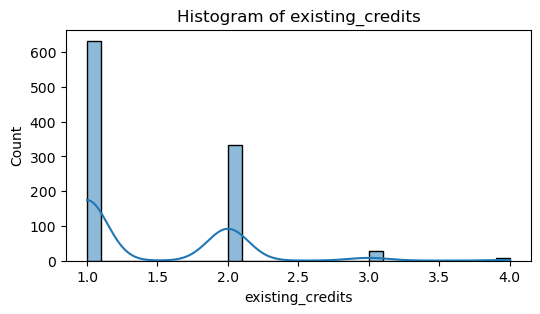

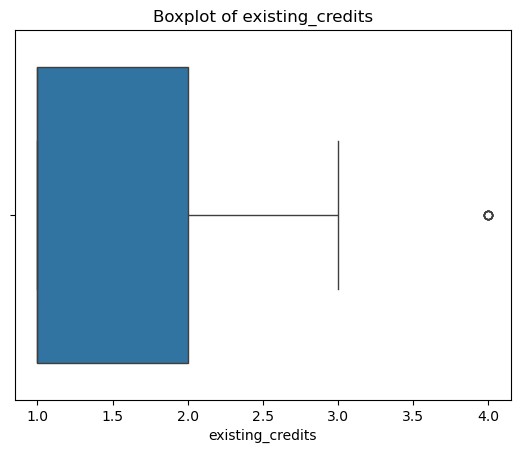

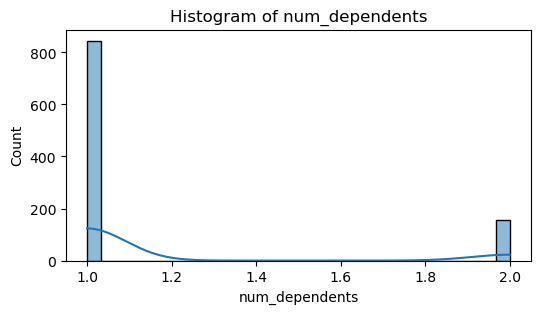

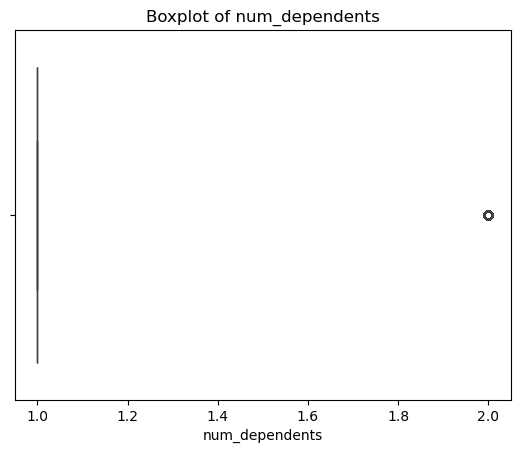

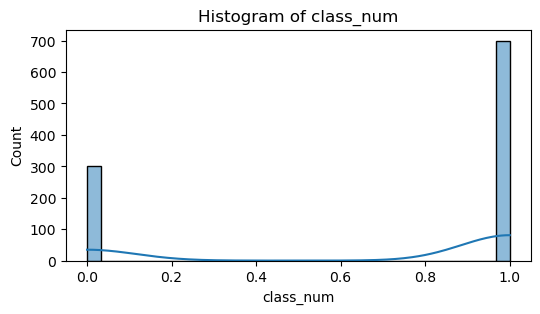

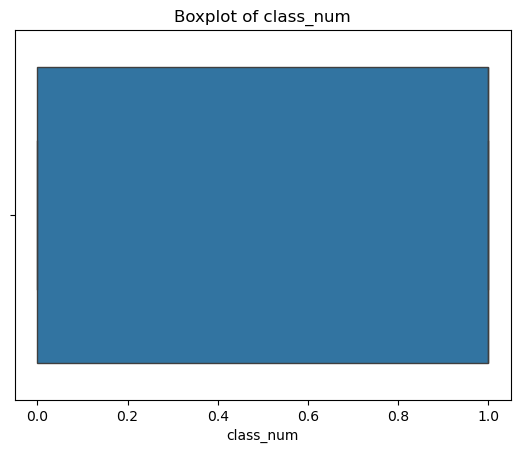

In [31]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_cols:
    plt.figure(figsize=(6,3))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Histogram of {col}")
    plt.show()

    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

4. Numeric vs target

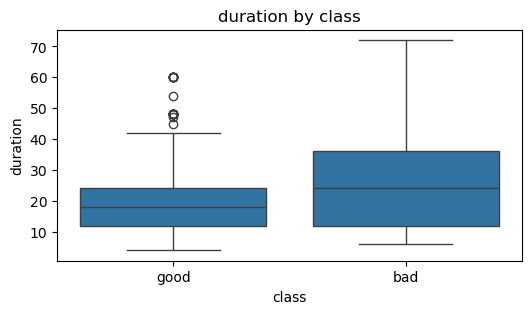

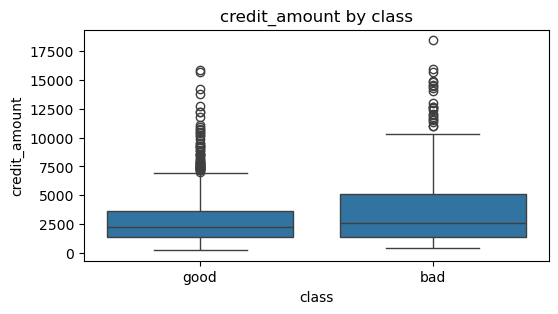

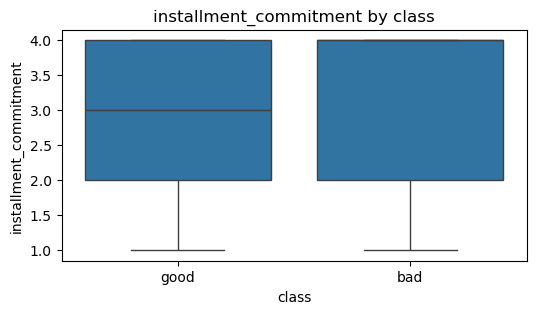

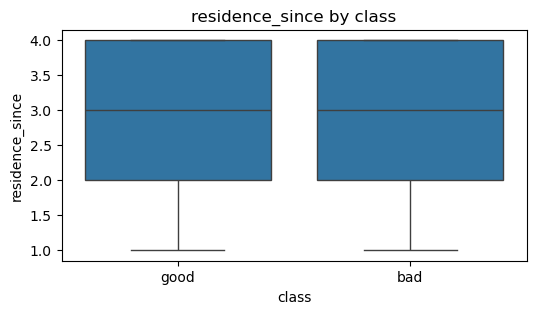

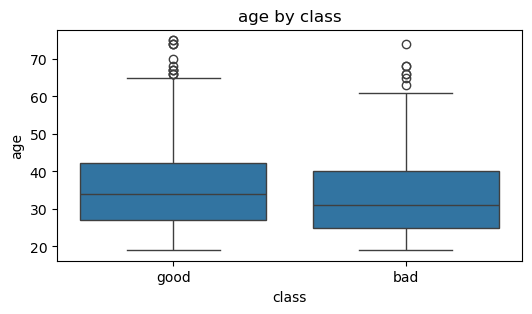

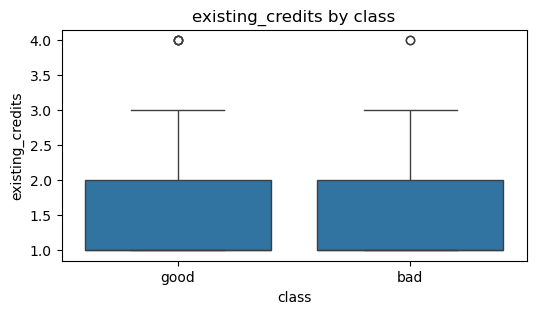

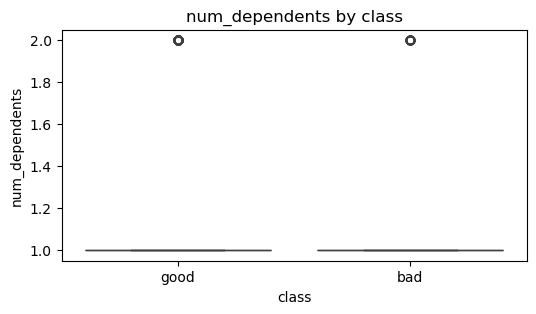

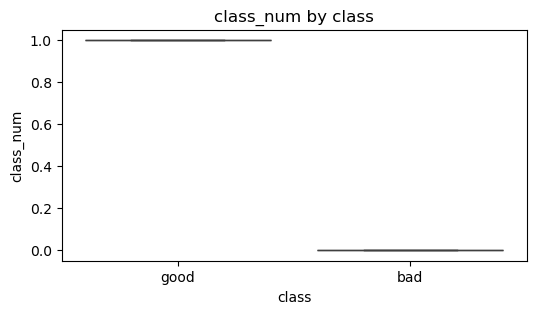

In [32]:
for col in numeric_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x="class", y=col, data=df)
    plt.title(f"{col} by class")
    plt.show()


5. Categorical features (distribution)

checking_status
no checking    361
<0             250
0<=X<200       240
NaN             91
>=200           58
Name: count, dtype: int64


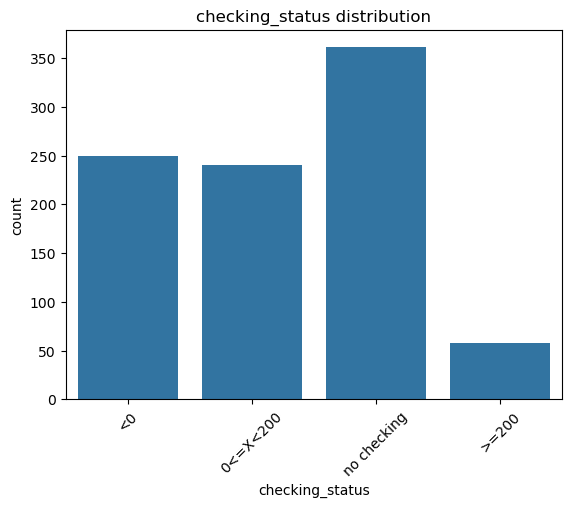

credit_history
existing paid                     511
critical/other existing credit    280
delayed previously                 83
all paid                           48
no credits/all paid                39
NaN                                39
Name: count, dtype: int64


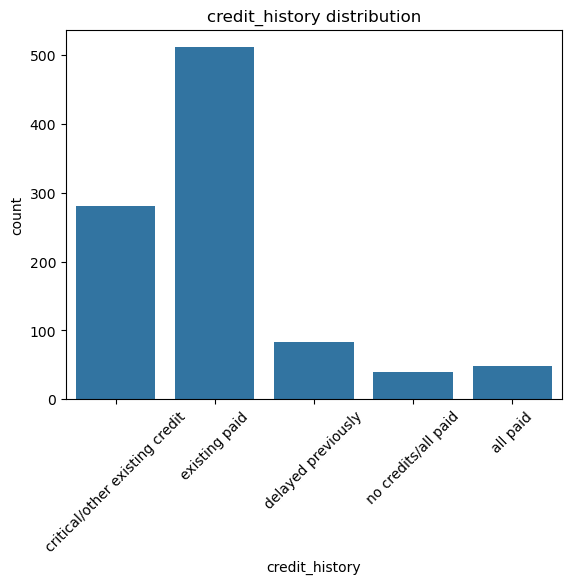

purpose
radio/tv               273
new car                220
furniture/equipment    171
used car                97
business                93
education               49
NaN                     43
repairs                 21
domestic appliance      12
other                   12
retraining               9
Name: count, dtype: int64


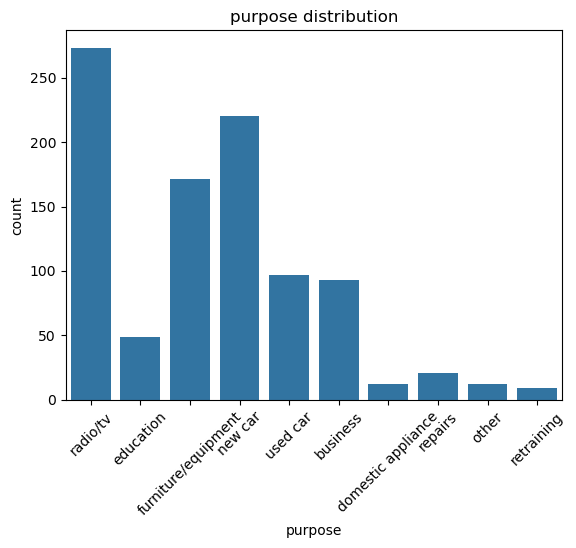

savings_status
<100                591
no known savings    183
100<=X<500          103
500<=X<1000          62
>=1000               48
NaN                  13
Name: count, dtype: int64


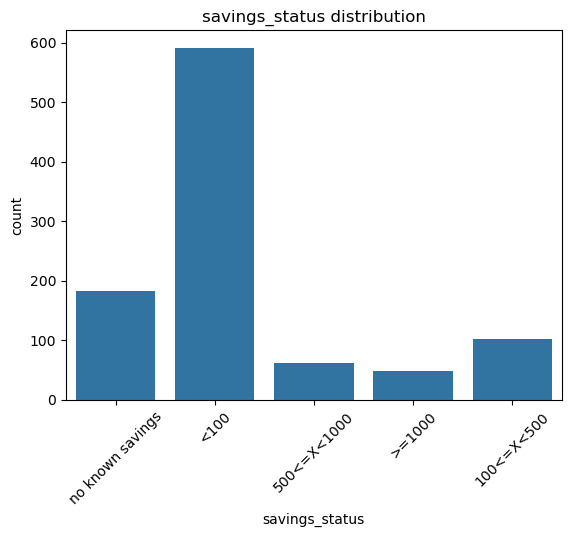

employment
1<=X<4        337
>=7           244
4<=X<7        174
<1            170
unemployed     62
NaN            13
Name: count, dtype: int64


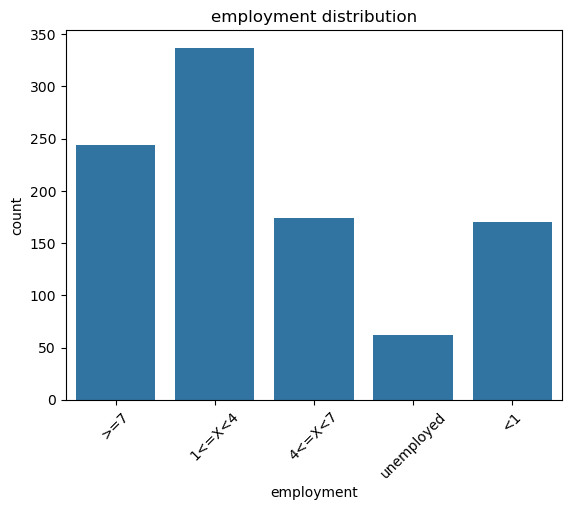

personal_status
male single           548
female div/dep/mar    310
male mar/wid           92
male div/sep           50
Name: count, dtype: int64


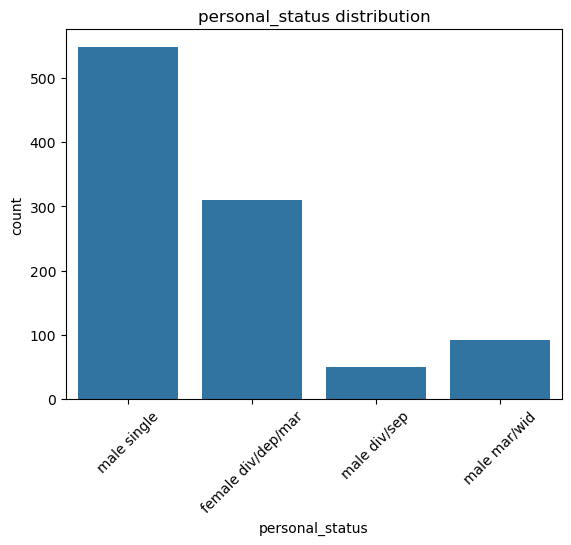

other_parties
none            907
guarantor        52
co applicant     41
Name: count, dtype: int64


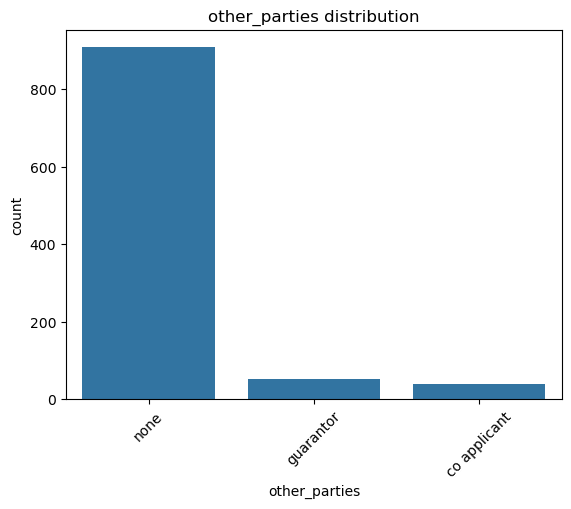

property_magnitude
car                  312
real estate          263
life insurance       222
no known property    145
NaN                   58
Name: count, dtype: int64


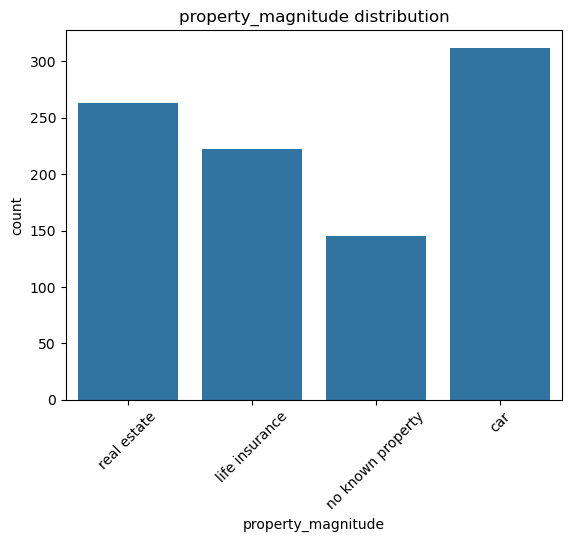

other_payment_plans
none      814
bank      139
stores     47
Name: count, dtype: int64


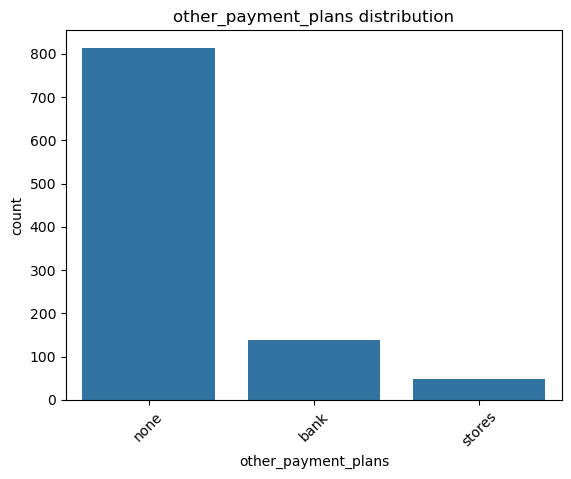

housing
own         668
rent        164
for free     99
NaN          69
Name: count, dtype: int64


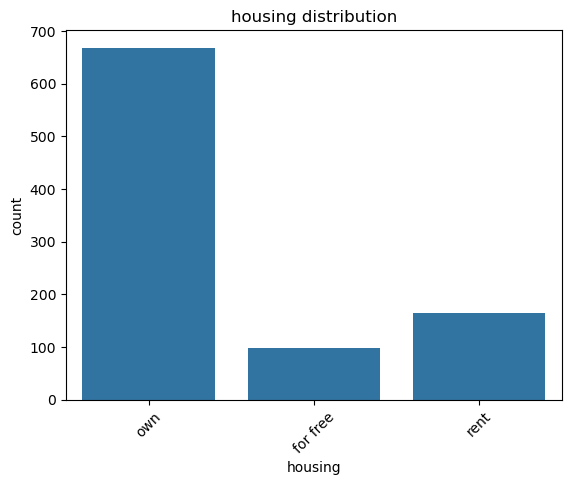

job
skilled                      630
unskilled resident           200
high qualif/self emp/mgmt    148
unemp/unskilled non res       22
Name: count, dtype: int64


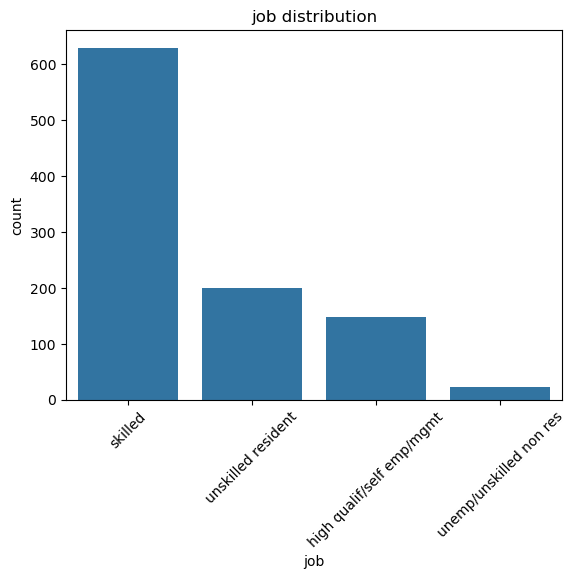

own_telephone
none    596
yes     404
Name: count, dtype: int64


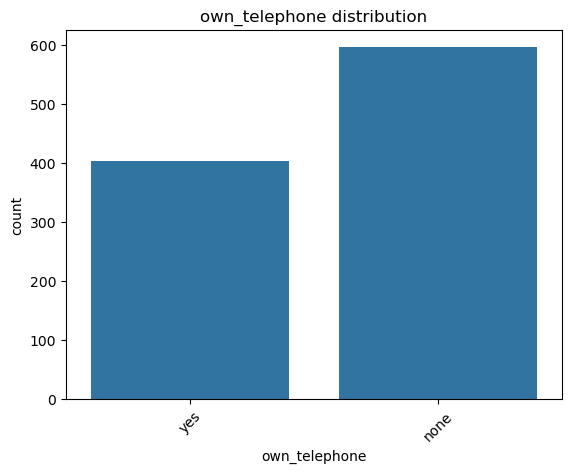

foreign_worker
yes    963
no      37
Name: count, dtype: int64


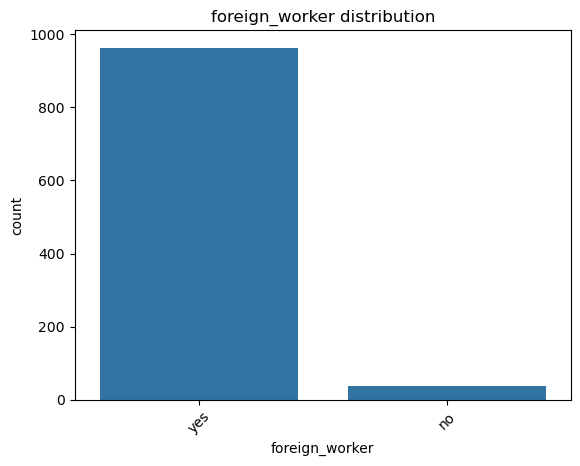

In [33]:
categorical_cols = df.select_dtypes(include=["object"]).columns.drop("class")
for col in categorical_cols:
    print(df[col].value_counts(dropna=False))
    sns.countplot(x=col, data=df)
    plt.title(f"{col} distribution")
    plt.xticks(rotation=45)
    plt.show()

6. Categorical vs target


checking_status:
 class                  bad       good
checking_status                      
0<=X<200         38.333333  61.666667
<0               50.000000  50.000000
>=200            20.689655  79.310345
no checking      11.911357  88.088643


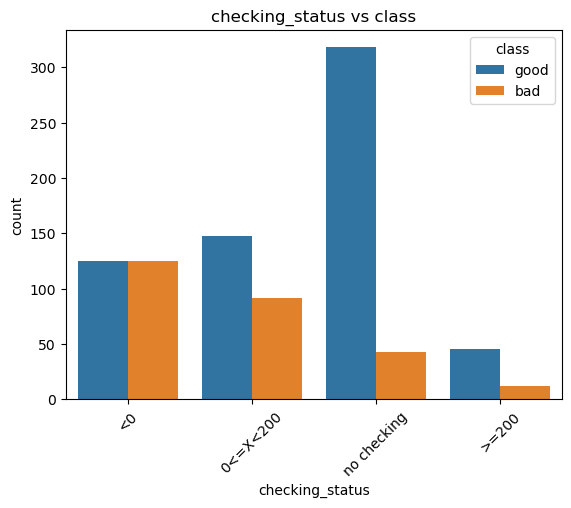


credit_history:
 class                                 bad       good
credit_history                                      
all paid                        58.333333  41.666667
critical/other existing credit  17.500000  82.500000
delayed previously              31.325301  68.674699
existing paid                   32.093933  67.906067
no credits/all paid             61.538462  38.461538


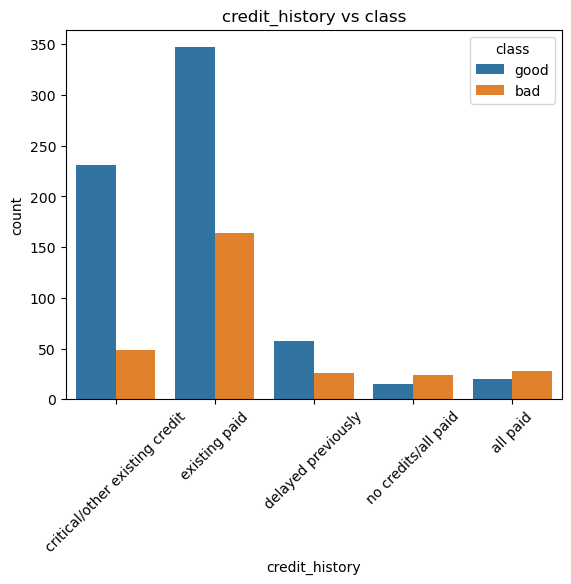


purpose:
 class                      bad       good
purpose                                  
business             35.483871  64.516129
domestic appliance   33.333333  66.666667
education            44.897959  55.102041
furniture/equipment  32.163743  67.836257
new car              37.272727  62.727273
other                41.666667  58.333333
radio/tv             22.710623  77.289377
repairs              33.333333  66.666667
retraining           11.111111  88.888889
used car             16.494845  83.505155


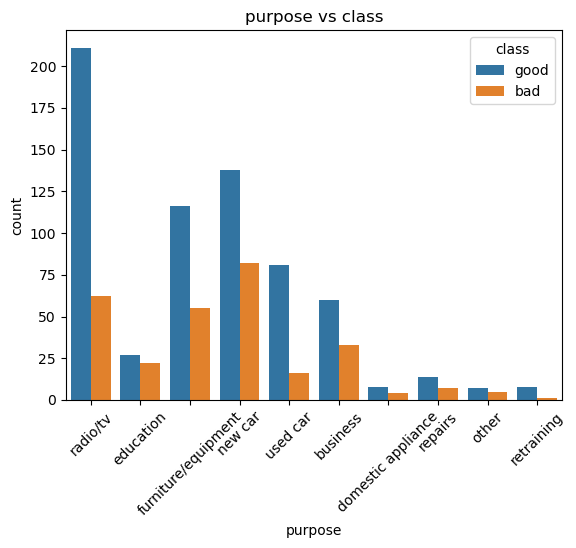


savings_status:
 class                   bad       good
savings_status                        
100<=X<500        33.009709  66.990291
500<=X<1000       17.741935  82.258065
<100              36.209814  63.790186
>=1000            12.500000  87.500000
no known savings  17.486339  82.513661


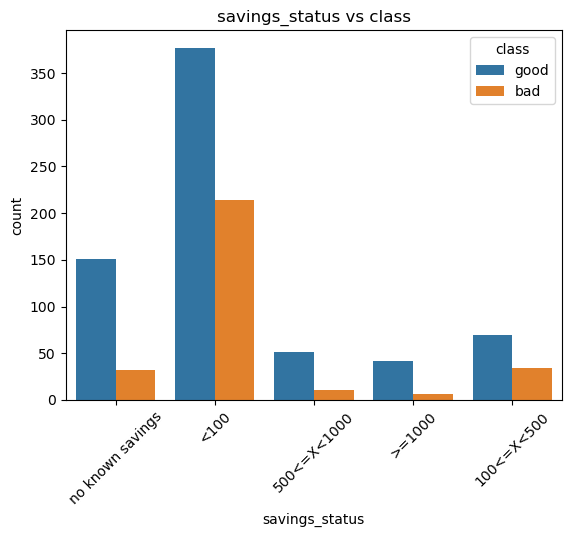


employment:
 class             bad       good
employment                      
1<=X<4      30.563798  69.436202
4<=X<7      22.413793  77.586207
<1          41.176471  58.823529
>=7         25.000000  75.000000
unemployed  37.096774  62.903226


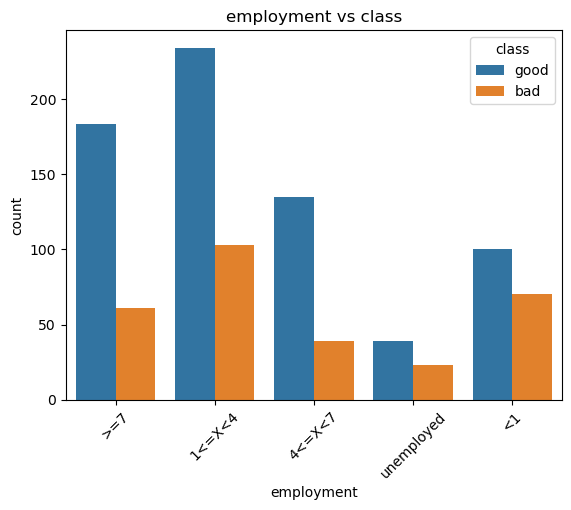


personal_status:
 class                     bad       good
personal_status                         
female div/dep/mar  35.161290  64.838710
male div/sep        40.000000  60.000000
male mar/wid        27.173913  72.826087
male single         26.642336  73.357664


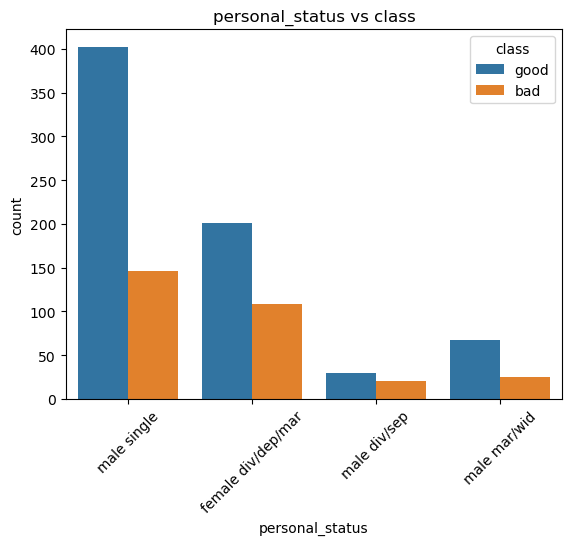


other_parties:
 class                bad       good
other_parties                      
co applicant   43.902439  56.097561
guarantor      19.230769  80.769231
none           29.988975  70.011025


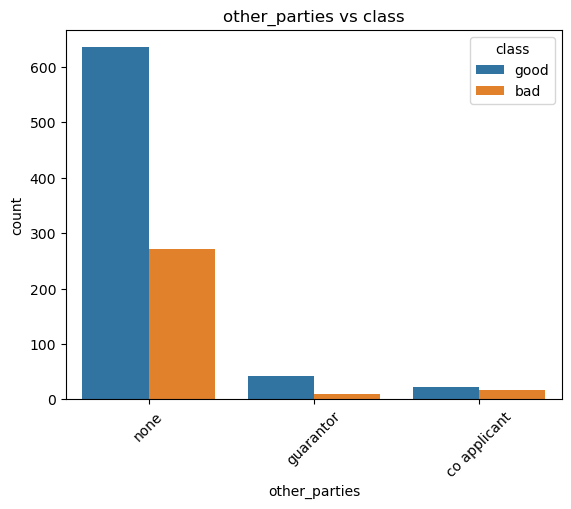


property_magnitude:
 class                     bad       good
property_magnitude                      
car                 30.769231  69.230769
life insurance      30.180180  69.819820
no known property   43.448276  56.551724
real estate         20.912548  79.087452


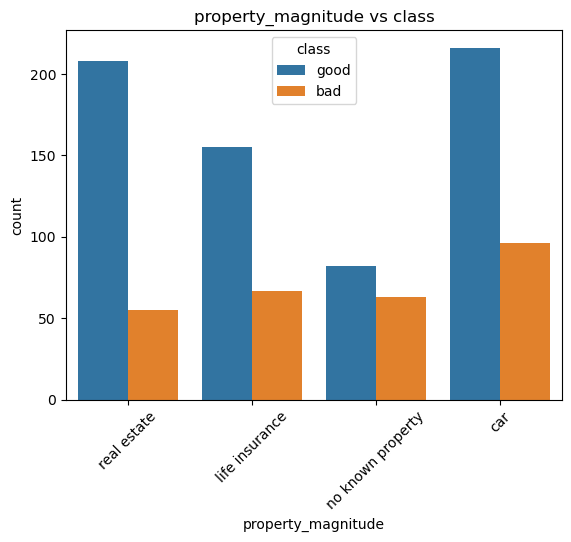


other_payment_plans:
 class                      bad       good
other_payment_plans                      
bank                 41.007194  58.992806
none                 27.518428  72.481572
stores               40.425532  59.574468


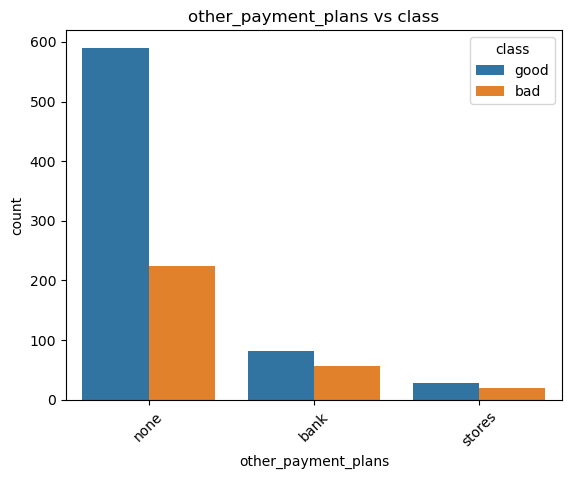


housing:
 class           bad       good
housing                       
for free  40.404040  59.595960
own       26.047904  73.952096
rent      39.634146  60.365854


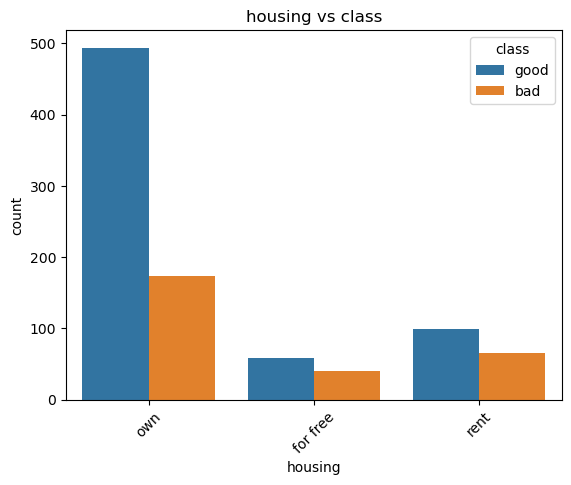


job:
 class                            bad       good
job                                            
high qualif/self emp/mgmt  34.459459  65.540541
skilled                    29.523810  70.476190
unemp/unskilled non res    31.818182  68.181818
unskilled resident         28.000000  72.000000


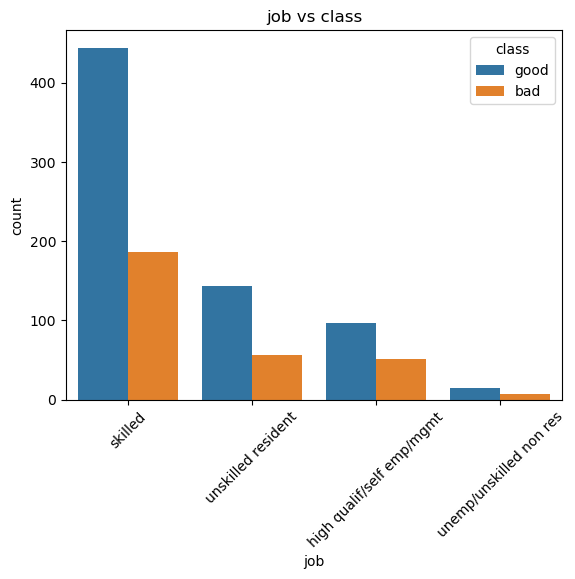


own_telephone:
 class                bad       good
own_telephone                      
none           31.375839  68.624161
yes            27.970297  72.029703


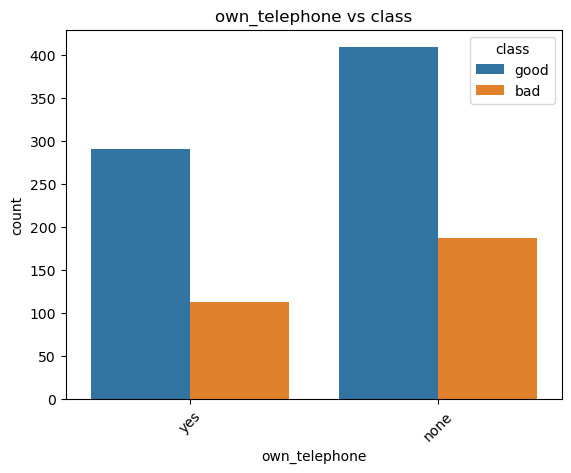


foreign_worker:
 class                 bad       good
foreign_worker                      
no              10.810811  89.189189
yes             30.737279  69.262721


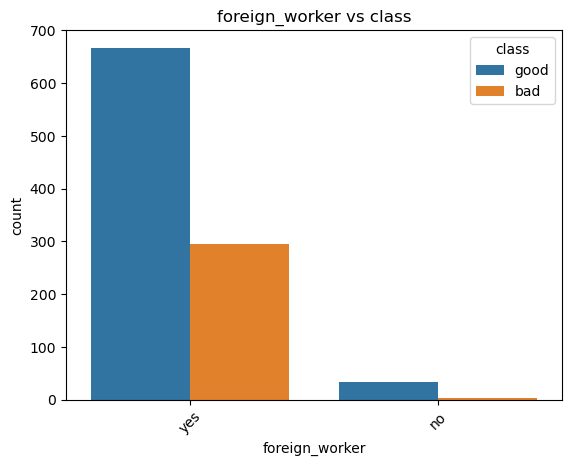

In [34]:
for col in categorical_cols:
    pd_crosstab = pd.crosstab(df[col], df["class"], normalize="index") * 100
    print(f"\n{col}:\n", pd_crosstab)

    sns.countplot(x=col, hue="class", data=df)
    plt.title(f"{col} vs class")
    plt.xticks(rotation=45)
    plt.show()